<a href="https://colab.research.google.com/github/Dominika26/Text1/blob/main/Licencjat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import RandomOverSampler 
from imblearn.under_sampling import RandomUnderSampler 

In [ ]:
tracks = pd.read_csv('genres_v2.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
tracks.groupby('genre').size()

genre
Dark Trap          4578
Emo                1680
Hiphop             3028
Pop                 461
Rap                1848
RnB                2099
Trap Metal         1956
Underground Rap    5875
dnb                2966
hardstyle          2936
psytrance          2961
techhouse          2975
techno             2956
trance             2999
trap               2987
dtype: int64

In [ ]:
tracks = tracks.drop(['id', 'type', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'song_name', 'Unnamed: 0', 'title'], axis=1)
tracks = tracks.drop(tracks[tracks.genre == 'Pop'].index)
tracks = tracks.drop(tracks[tracks.genre == 'RnB'].index)

tracks['genre'].replace({'Hiphop': 'Hip and rap', 'Rap':'Hip and rap',  'Underground Rap': 'Hip and rap'}, inplace=True)
tracks['genre'].replace({'Trap Metal': 'Trap', 'Dark Trap':'Trap', 'trap':'Trap'}, inplace=True)


In [ ]:
tracks.groupby('genre').size()

genre
Emo             1680
Hip and rap    10751
Trap            9521
dnb             2966
hardstyle       2936
psytrance       2961
techhouse       2975
techno          2956
trance          2999
dtype: int64

In [ ]:
#zmienne X
features = tracks.drop(['genre'], axis=1)

#zmienne y
labels = tracks.genre

#standaryzcja
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:

rus = RandomOverSampler(random_state=0, sampling_strategy='minority')
X_over, y_over = rus.fit_resample(scaled_features, labels)

rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X_over, y_over)

In [ ]:

rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X_over, y_over)

In [ ]:
resampled_y = pd.DataFrame(y_resampled, columns=['genre'])

In [ ]:
resampled_y.groupby('genre').size()

genre
Emo            2936
Hip and rap    2936
Trap           2936
dnb            2936
hardstyle      2936
psytrance      2936
techhouse      2936
techno         2936
trance         2936
dtype: int64

In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(
    X_resampled, y_resampled, test_size = 0.20, stratify=y_resampled)

In [ ]:
train_y = pd.DataFrame(train_labels, columns=['genre'])

In [ ]:
train_y.groupby('genre').size()

genre
Emo            2349
Hip and rap    2349
Trap           2349
dnb            2349
hardstyle      2349
psytrance      2349
techhouse      2348
techno         2349
trance         2348
dtype: int64

In [ ]:
test_y = pd.DataFrame(test_labels, columns=['genre'])

In [ ]:

test_y = pd.DataFrame(test_labels, columns=['genre'])

In [ ]:
test_y.groupby('genre').size()

genre
Emo            587
Hip and rap    587
Trap           587
dnb            587
hardstyle      587
psytrance      587
techhouse      588
techno         587
trance         588
dtype: int64

**Decision tree**

In [ ]:

tree = DecisionTreeClassifier(max_depth = 15, min_samples_leaf= 1, random_state=20)
tree.fit(train_features, train_labels)

DecisionTreeClassifier(max_depth=15, random_state=20)

In [ ]:

pred_labels_tree = tree.predict(test_features)
class_rep_tree = classification_report(test_labels, pred_labels_tree)

print("Decision Tree: \n", class_rep_tree)

Decision Tree: 
               precision    recall  f1-score   support

         Emo       0.82      0.90      0.86       587
 Hip and rap       0.70      0.69      0.69       587
        Trap       0.54      0.50      0.52       587
         dnb       0.98      0.98      0.98       587
   hardstyle       0.88      0.89      0.89       587
   psytrance       0.85      0.85      0.85       587
   techhouse       0.85      0.86      0.85       588
      techno       0.77      0.74      0.75       587
      trance       0.79      0.79      0.79       588

    accuracy                           0.80      5285
   macro avg       0.80      0.80      0.80      5285
weighted avg       0.80      0.80      0.80      5285



In [ ]:
 
y_pred = tree.predict(test_features)

cf_matrix = confusion_matrix(test_labels, y_pred)

print(cf_matrix)

[[529  20  18   4  16   0   0   0   0]
 [ 39 406 122   0   5   2   5   3   5]
 [ 40 132 293   5  41  22  13  15  26]
 [  7   4   3 573   0   0   0   0   0]
 [ 11   6  32   1 525  12   0   0   0]
 [  0   1  25   0   8 498   0  14  41]
 [  7   5  10   0   0   0 504  62   0]
 [  0   1  10   0   0  28  60 437  51]
 [ 16   7  25   0   0  25  13  40 462]]


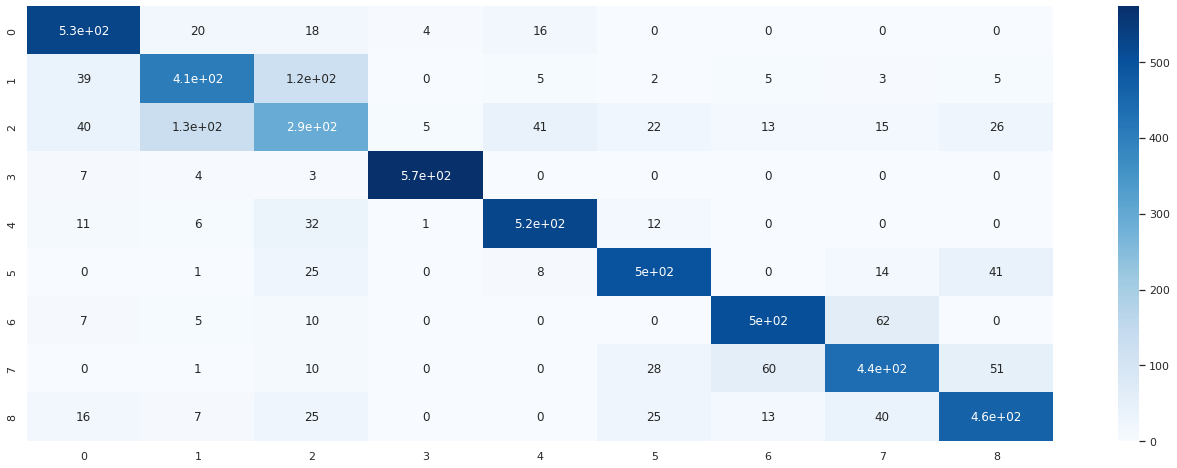

In [ ]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(23,8)})
sns.heatmap(cf_matrix, annot=True, cmap='Blues')


In [ ]:
cross_val_score(tree, train_features, train_labels, cv=10, scoring="accuracy")

array([0.80652791, 0.81835383, 0.80416272, 0.79517502, 0.80652791,
       0.82024598, 0.80227058, 0.7961211 , 0.78287606, 0.79649787])

In [ ]:
from sklearn.model_selection import GridSearchCV

classifier = DecisionTreeClassifier()

params = {'max_depth': np.arange(15, 20),
          'random_state': [10, 20, 30],
         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]}

grid_search = GridSearchCV(classifier, param_grid=params, scoring='accuracy', cv=5)
grid_search.fit(train_features, train_labels)

grid_search.best_params_

KeyboardInterrupt: ignored

**Random forest**

In [ ]:
random_forest = RandomForestClassifier(n_estimators=500)
random_forest.fit(train_features, train_labels)

pred_labels_forest = random_forest.predict(test_features)
class_rep_forest = classification_report(test_labels, pred_labels_forest)

print("Random forest: \n", class_rep_forest)

Random forest: 
               precision    recall  f1-score   support

         Emo       0.90      0.96      0.93       587
 Hip and rap       0.76      0.83      0.79       587
        Trap       0.73      0.55      0.63       587
         dnb       0.99      0.99      0.99       587
   hardstyle       0.92      0.96      0.94       587
   psytrance       0.89      0.90      0.90       587
   techhouse       0.89      0.92      0.91       588
      techno       0.86      0.84      0.85       587
      trance       0.86      0.89      0.87       588

    accuracy                           0.87      5285
   macro avg       0.87      0.87      0.87      5285
weighted avg       0.87      0.87      0.87      5285



In [ ]:
y_pred = random_forest.predict(test_features)

cf_matrix = confusion_matrix(test_labels, y_pred)

print(cf_matrix)

[[563  12   5   2   5   0   0   0   0]
 [ 23 485  69   0   4   0   6   0   0]
 [ 28 131 323   4  37  24   9  11  20]
 [  4   4   0 579   0   0   0   0   0]
 [  1   0  19   0 561   6   0   0   0]
 [  0   0  12   0   3 530   0   8  34]
 [  2   7   1   0   0   0 541  37   0]
 [  0   0   3   0   0  19  41 491  33]
 [  6   1   8   0   0  18  10  23 522]]


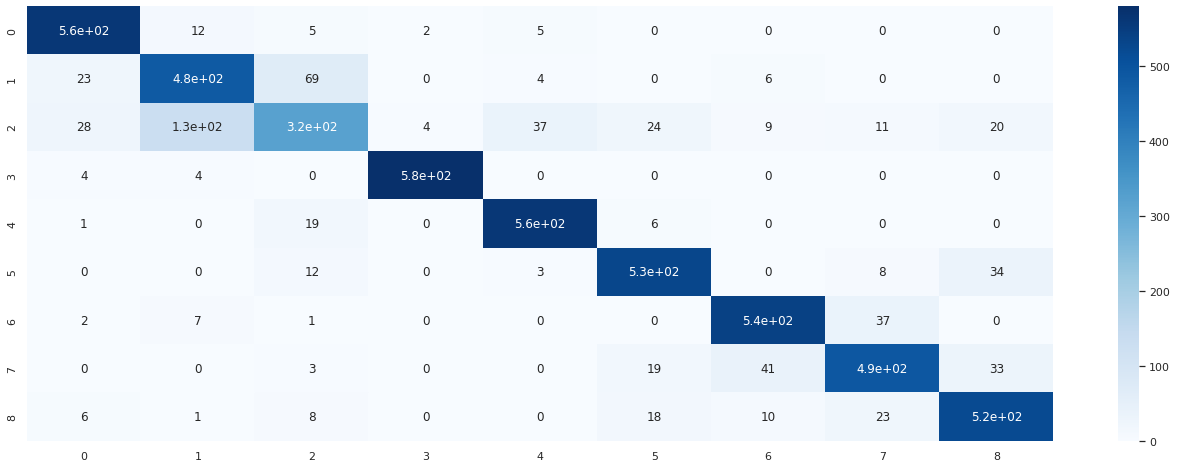

In [ ]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(23,8)})
sns.heatmap(cf_matrix, annot=True, cmap='Blues')

In [ ]:
svc = SVC(C = 100, kernel="rbf", gamma = 0.1)
svc.fit(train_features, train_labels)

pred_labels_svc = svc.predict(test_features)
class_rep_svc = classification_report(test_labels, pred_labels_svc)

print("SVM: \n", class_rep_svc)

SVM: 
               precision    recall  f1-score   support

         Emo       0.82      0.88      0.85       587
 Hip and rap       0.68      0.73      0.70       587
        Trap       0.59      0.50      0.54       587
         dnb       0.96      0.97      0.96       587
   hardstyle       0.86      0.90      0.88       587
   psytrance       0.87      0.88      0.87       587
   techhouse       0.87      0.88      0.87       588
      techno       0.84      0.80      0.82       587
      trance       0.84      0.83      0.83       588

    accuracy                           0.82      5285
   macro avg       0.81      0.82      0.82      5285
weighted avg       0.81      0.82      0.82      5285



In [ ]:
y_pred = svc.predict(test_features)

cf_matrix = confusion_matrix(test_labels, y_pred)

print(cf_matrix)

[[515  25   6   7  25   0   4   0   5]
 [ 47 429  95   5   1   1   4   0   5]
 [ 27 150 294  12  41  20  10  11  22]
 [  9   7   4 567   0   0   0   0   0]
 [ 11   4  36   0 529   7   0   0   0]
 [  1   1  14   0  16 515   0  14  26]
 [  6  10   8   0   0   1 518  39   6]
 [  0   4  18   0   0  22  46 469  28]
 [  9   1  22   0   0  28  15  27 486]]


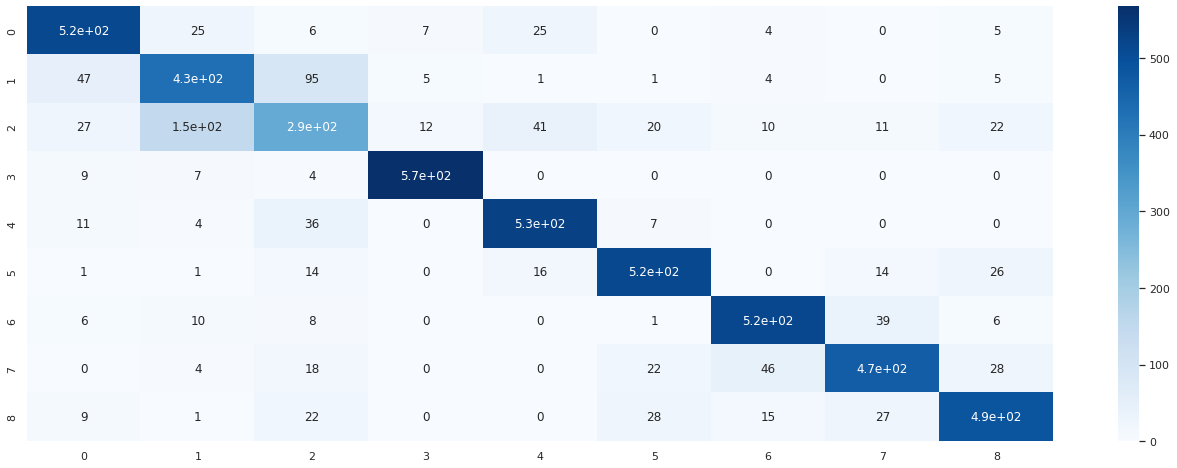

In [ ]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(23,8)})
sns.heatmap(cf_matrix, annot=True, cmap='Blues')

In [ ]:
gaussian = GaussianNB()
gaussian.fit(train_features, train_labels)

pred_labels_gaus = gaussian.predict(test_features)
class_rep_gaus = classification_report(test_labels, pred_labels_gaus)

print("Decision Tree: \n", class_rep_gaus)

In [ ]:
y_pred = gaussian.predict(test_features)

cf_matrix = confusion_matrix(test_labels, y_pred)

print(cf_matrix)